<a href="https://colab.research.google.com/github/jiw3026/DL_NLP_CODE/blob/main/01_3_Tensorflow_%EB%AA%A8%EB%8D%B8%EB%A7%81%EA%B8%B0%EC%B4%88(%EC%BD%94%EB%93%9C%EC%98%88%EC%8B%9C).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf 
import numpy as np 
import pandas as pd 
from sklearn.datasets import make_classification, make_circles
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models

### 실습. 유방암 데이터 생성

위스콘신 대학교에서 제공한 유방암 진단결과 데이터이다.  

feature  
* 양성(benign, 0)과 악성(malignant, 1)을 구분할 수 있는 종양의 크기, 모양 등의 다양한 특성값을 가진다.
* `mean_` : 1 ~ 10번째 feature는 특성별 평균값을 의미한다.
* `_error` : 11 ~ 20번째 feature는 특성별 표준오차(Standard Error)를 의미한다.
* `worst_` : 21 ~ 30번째까지는 각 종양의 특성들에서 제일 큰 3개의 값을 평균낸 값을 의미한다.


<a title="Preethi Sekar, Jyotsna Naresh Bharti, Jitendra Singh Nigam, Ankit Sharma, and Priyanka Bhatia Soni, CC BY 3.0 &lt;https://creativecommons.org/licenses/by/3.0&gt;, via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File:Micrograph_of_ductal_carcinoma_with_marked_nuclear_pleomorphism_and_increased_mitotic_rate.jpg"><img width="512" alt="Micrograph of ductal carcinoma with marked nuclear pleomorphism and increased mitotic rate" src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f8/Micrograph_of_ductal_carcinoma_with_marked_nuclear_pleomorphism_and_increased_mitotic_rate.jpg/512px-Micrograph_of_ductal_carcinoma_with_marked_nuclear_pleomorphism_and_increased_mitotic_rate.jpg"></a>

<a href="https://commons.wikimedia.org/wiki/File:Micrograph_of_ductal_carcinoma_with_marked_nuclear_pleomorphism_and_increased_mitotic_rate.jpg">Preethi Sekar, Jyotsna Naresh Bharti, Jitendra Singh Nigam, Ankit Sharma, and Priyanka Bhatia Soni</a>, <a href="https://creativecommons.org/licenses/by/3.0">CC BY 3.0</a>, via Wikimedia Commons

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 유방암 data를 불러온 후, cancer 변수에 담아보자.
cancer = load_breast_cancer()

# 유방암 data를 학습용과 검증용 데이터 세트로 분리해보자.
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                   test_size=0.3, shuffle = True)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [ ]:
model.compile(
    optimizer = 'adam', 
    loss = 'binary_crossentropy', 
    metrics = 'accuracy'
)

In [ ]:
model.fit(X_train, y_train, epochs = 10)

Epoch 1/10
13/13 [==============================] - 9s 8ms/step - loss: 6.9149 - accuracy: 0.5075
Epoch 2/10
13/13 [==============================] - 0s 6ms/step - loss: 2.4496 - accuracy: 0.7688
Epoch 3/10
13/13 [==============================] - 0s 5ms/step - loss: 1.2785 - accuracy: 0.8417
Epoch 4/10
13/13 [==============================] - 0s 6ms/step - loss: 1.0047 - accuracy: 0.8794
Epoch 5/10
13/13 [==============================] - 0s 6ms/step - loss: 0.8873 - accuracy: 0.8618
Epoch 6/10
13/13 [==============================] - 0s 5ms/step - loss: 0.6065 - accuracy: 0.8869
Epoch 7/10
13/13 [==============================] - 0s 4ms/step - loss: 0.4644 - accuracy: 0.8869
Epoch 8/10
13/13 [==============================] - 0s 5ms/step - loss: 0.5364 - accuracy: 0.8945
Epoch 9/10
13/13 [==============================] - 0s 7ms/step - loss: 0.3239 - accuracy: 0.9045
Epoch 10/10
13/13 [==============================] - 0s 7ms/step - loss: 0.3142 - accuracy: 0.8945


In [ ]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\n테스트 정확도:', test_acc)

6/6 - 0s - loss: 0.2048 - accuracy: 0.9298 - 292ms/epoch - 49ms/step

테스트 정확도: 0.9298245906829834


### 실습. 와인데이터

In [ ]:
from sklearn.datasets import load_wine

# wine data를 불러온 후, wine 변수에 담아보자.
wine = load_wine()

# wine data를 학습용과 검증용 데이터 세트로 분리해보자.
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target,
                                                   test_size = 0.3, shuffle = True)

In [ ]:
X_train, y_train

(array([[1.281e+01, 2.310e+00, 2.400e+00, ..., 6.600e-01, 1.360e+00,
         5.600e+02],
        [1.237e+01, 1.210e+00, 2.560e+00, ..., 1.190e+00, 2.300e+00,
         6.780e+02],
        [1.329e+01, 1.970e+00, 2.680e+00, ..., 1.070e+00, 2.840e+00,
         1.270e+03],
        ...,
        [1.336e+01, 2.560e+00, 2.350e+00, ..., 7.000e-01, 2.470e+00,
         7.800e+02],
        [1.176e+01, 2.680e+00, 2.920e+00, ..., 1.230e+00, 2.500e+00,
         6.070e+02],
        [1.390e+01, 1.680e+00, 2.120e+00, ..., 9.100e-01, 3.330e+00,
         9.850e+02]]),
 array([2, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 2, 1, 0,
        1, 0, 2, 2, 1, 0, 2, 0, 1, 0, 2, 2, 0, 1, 0, 2, 0, 2, 1, 1, 2, 0,
        2, 1, 1, 0, 0, 1, 0, 1, 0, 2, 0, 2, 1, 1, 0, 2, 2, 2, 0, 1, 1, 0,
        0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0, 1, 2, 2, 2, 0, 1, 2, 1, 0, 0,
        2, 1, 1, 2, 0, 1, 1, 1, 0, 1, 0, 0, 2, 2, 1, 0, 1, 0, 0, 1, 0, 0,
        0, 1, 1, 1, 1, 1, 2, 1, 1, 0, 0, 2, 1, 0]))

In [ ]:
X_train.shape

(124, 13)

In [ ]:
# from tensorflow.keras.utils import to_categorical
# y_train = to_categorical(y_train, 3)
# y_test = to_categorical(y_test, 3)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, input_shape = (13,), activation = 'relu'),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 64)                896       
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dropout_7 (Dropout)         (None, 32)                0         
                                                                 
 dense_15 (Dense)            (None, 3)                 99        
                                                                 
Total params: 3,075
Trainable params: 3,075
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001) ,
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = 'accuracy'
)

In [ ]:
model.fit(X_train, y_train, epochs = 50, validation_split = 0.1, 
          callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)])

Epoch 1/50
4/4 [==============================] - 5s 75ms/step - loss: 133.0738 - accuracy: 0.3604 - val_loss: 58.6676 - val_accuracy: 0.6154
Epoch 2/50
4/4 [==============================] - 0s 13ms/step - loss: 77.4417 - accuracy: 0.3964 - val_loss: 31.2271 - val_accuracy: 0.6154
Epoch 3/50
4/4 [==============================] - 0s 15ms/step - loss: 63.7914 - accuracy: 0.3784 - val_loss: 39.4498 - val_accuracy: 0.2308
Epoch 4/50
4/4 [==============================] - 0s 12ms/step - loss: 55.8346 - accuracy: 0.3964 - val_loss: 40.3611 - val_accuracy: 0.2308
Epoch 5/50
4/4 [==============================] - 0s 12ms/step - loss: 44.4302 - accuracy: 0.4505 - val_loss: 34.5732 - val_accuracy: 0.2308


In [ ]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\n테스트 정확도:', test_acc)

2/2 - 0s - loss: 47.1145 - accuracy: 0.2407 - 38ms/epoch - 19ms/step

테스트 정확도: 0.24074074625968933


### 실습 - 회귀

In [ ]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
x_data = housing.data
y_data = housing.target

In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
x_scaled = std_scaler.fit_transform(x_data)

In [ ]:
# 랜덤하게 학습데이터와 테스트 데이터를 분리하세요
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_data, random_state = 42, test_size = 0.2)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16512, 8), (4128, 8), (16512,), (4128,))

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, input_shape = (8, ), activation = 'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001) ,
    loss = 'mse',
    metrics=['mae', 'mse']
)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                576       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,689
Trainable params: 2,689
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs = 30, validation_split = 0.1)

Epoch 1/30
465/465 [==============================] - 3s 4ms/step - loss: 0.8759 - mae: 0.6387 - mse: 0.8759 - val_loss: 0.4673 - val_mae: 0.4811 - val_mse: 0.4673
Epoch 2/30
465/465 [==============================] - 2s 3ms/step - loss: 0.4454 - mae: 0.4585 - mse: 0.4454 - val_loss: 0.4158 - val_mae: 0.4538 - val_mse: 0.4158
Epoch 3/30
465/465 [==============================] - 2s 3ms/step - loss: 0.3712 - mae: 0.4322 - mse: 0.3712 - val_loss: 0.4085 - val_mae: 0.4558 - val_mse: 0.4085
Epoch 4/30
465/465 [==============================] - 2s 4ms/step - loss: 0.3665 - mae: 0.4230 - mse: 0.3665 - val_loss: 0.3889 - val_mae: 0.4455 - val_mse: 0.3889
Epoch 5/30
465/465 [==============================] - 2s 4ms/step - loss: 0.3473 - mae: 0.4129 - mse: 0.3473 - val_loss: 0.3856 - val_mae: 0.4329 - val_mse: 0.3856
Epoch 6/30
465/465 [==============================] - 2s 3ms/step - loss: 0.3320 - mae: 0.4051 - mse: 0.3320 - val_loss: 0.3831 - val_mae: 0.4273 - val_mse: 0.3831
Epoch 7/30
465/4

In [ ]:
model.evaluate(X_test,  y_test, verbose=2)

129/129 - 0s - loss: 0.2882 - mae: 0.3629 - mse: 0.2882 - 254ms/epoch - 2ms/step


[0.28817927837371826, 0.36289456486701965, 0.28817927837371826]

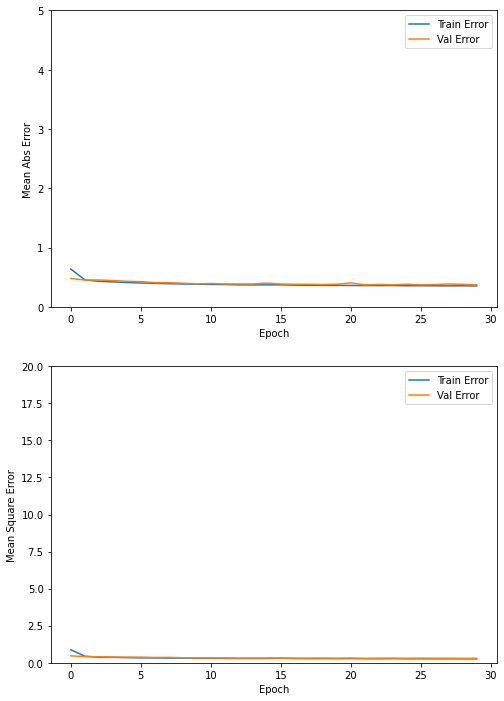

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure(figsize=(8,12))

  plt.subplot(2,1,1)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()

  plt.subplot(2,1,2)
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  plt.ylim([0,20])
  plt.legend()
  plt.show()

plot_history(history)

In [ ]:
loss, mae, mse = model.evaluate(X_test, y_test, verbose=2)

print("테스트 세트의 평균 절대 오차: {:5.2f} MPG".format(mae))

129/129 - 0s - loss: 0.2882 - mae: 0.3629 - mse: 0.2882 - 252ms/epoch - 2ms/step
테스트 세트의 평균 절대 오차:  0.36 MPG


129/129 [==============================] - 0s 1ms/step


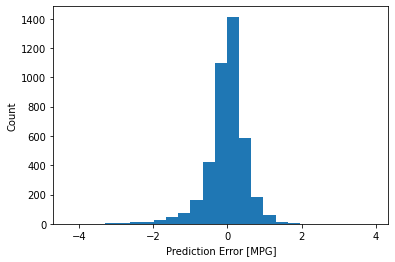

In [ ]:
#  오차의 분포
test_predictions = model.predict(X_test).flatten()

error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

# 의류 이미지 예측하기

### 1. 데이터셋 로드 및 탐색
 - fashion_mnist : 의류 사진 
    - 크기 : 28*28 (흑백)
    - train : 6만/ test : 1만
    - 라벨 : 10가지('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat' , 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot')

In [ ]:
from tensorflow.keras import datasets 

fashion = datasets.fashion_mnist
fashion_data = fashion.load_data()
fashion_data

4422102/4422102 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [ ]:
len(fashion_data)

2

In [ ]:
(train_imgs, train_labels), (test_imgs, test_labels) = fashion_data 

In [ ]:
train_imgs.shape, train_labels.shape, test_imgs.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
import numpy as np
n_class = np.unique(train_labels).shape[0]
n_class

10

**< dataset summary >**  
n_trainset = 60,000 / n_testset = 10,000  
1 image shape = 28 x 28 / 1 label shape = 1

In [ ]:
train_imgs[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

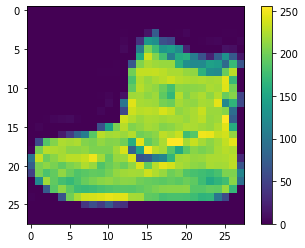

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(train_imgs[0])
plt.colorbar()
plt.show()

In [ ]:
train_labels[0]

9

데이터셋 안에 label의 이름이 없기 때문에, 직접 넣어줍니다.

In [ ]:
label_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
label_names[train_labels[0]]

'Ankle boot'

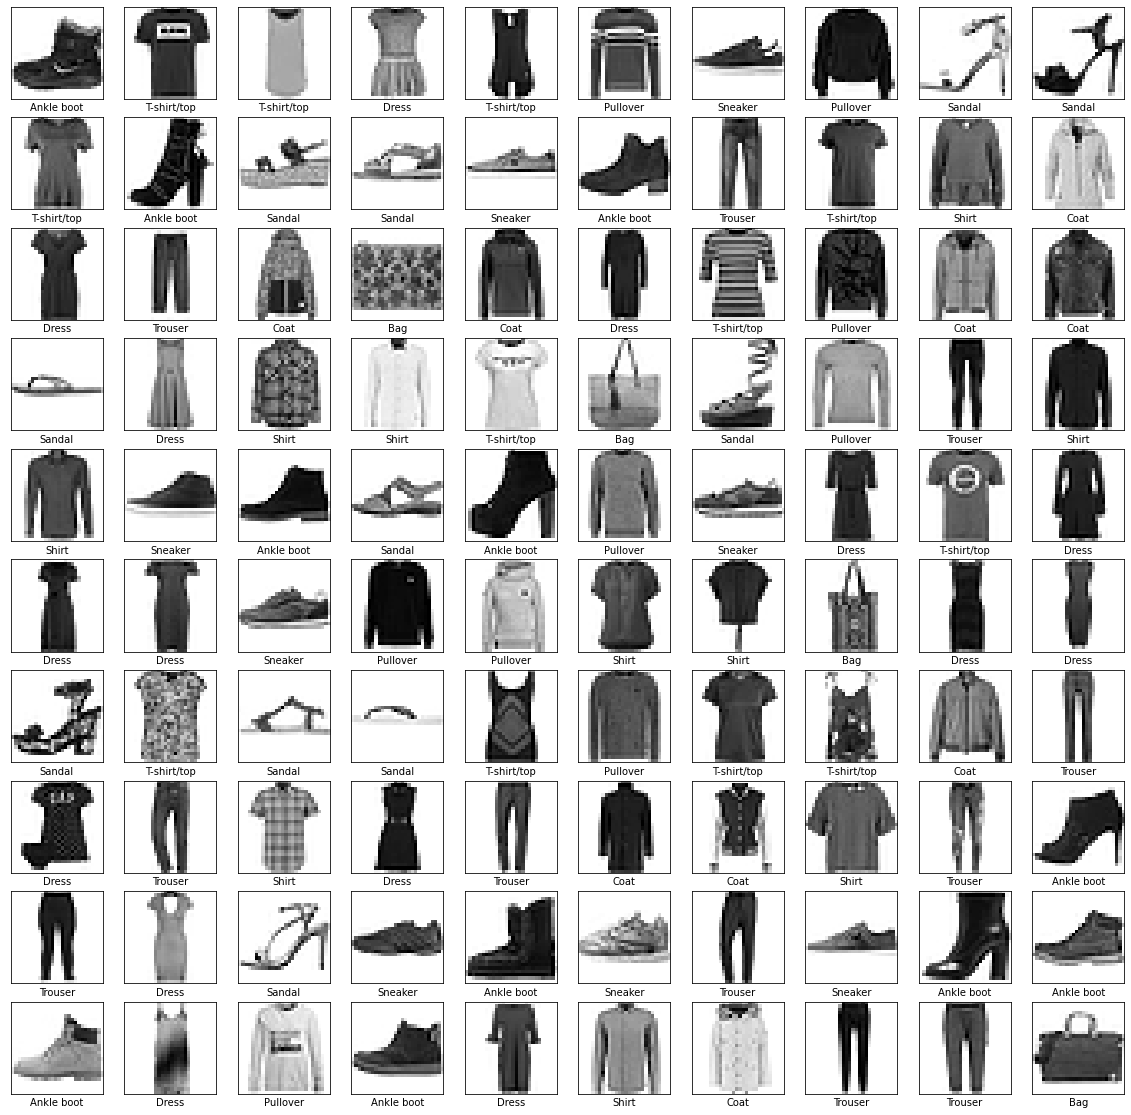

In [ ]:
plt.figure(figsize=(20,20))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_imgs[i], cmap=plt.cm.binary)
    plt.xlabel(label_names[train_labels[i]])
plt.show()

### 2. 모델 구축 
- tf.keras.Sequential()
- 모델을 구축하는 가장 기본적인 방법으로 아래 두가지 방법이 있다.
1. model = tf.keras.Sequntial([ 입력층 , 은닉1층 , 은닉2층 , ... 출력층 ]) 와 같이, 리스트 형식으로 각 층을 묶어서 선언한다.
2. model = tf.keras.Sequential() 선언 후, model.add()를 이용해 한 층씩 쌓아준다.
  
- 입력층에서 가장 기본적인 방법은 Flatten()을 이용하여 1차원 형태로 받는 것이다.
    - Flatten()에서는 입력받을 데이터의 input_shape을 설정해줘야 한다.
- 각 층의 가장 기본적인 형태는 Dense()를 이용하여 "완전연결계층"형태로 구성하는 것이다.
    - Dense()에서는 먼저 뉴런의 개수(노드의 개수)를 설정해줘야 한다.
    - 활성화 함수 종류, 초기화방법 등을 설정해줄 수 있다.


In [ ]:
# 기본 모델 = 완전연결계층 = Dense
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

### 3. 모델 컴파일
모델을 훈련하기 전에 필요한 몇 가지 설정이 모델 컴파일 단계에서 추가됩니다:

- 옵티마이저(Optimizer) : 모델의 업데이트 방법(최적화 방법) 설정
    - adam, rmsprop, adagrad, sgd etc.
- 손실 함수(Loss function) : 훈련 시, 오차 측정 방식 설정  
    - binary_crossentropy : 이진 분류 시 사용
    - categorical_crossentropy : 다중 분류 시 one hot encoding label일 때 사용 
    - sparse_categorical_crossentropy : 다중 분류 시 정수형 label일 때 사용
- 지표(Metrics) : 훈력 시, 학습데이터과 검증데이터의 평가 지표 설정
    - 기본적으로 리스트 형태로 받도록 설정
    - accuracy, auc, precision, recall etc.
  
기본적으로 문자열 형태로 지정해주지만, 직접 함수를 지정해줄 수 있다.

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### 4. 모델 훈련
신경망 모델을 훈련하는 단계는 다음과 같습니다:  
.  
훈련 데이터를 모델에 주입합니다-이 예에서는 train_images와 train_labels 배열입니다.  
모델이 train img와 train label의 관계를 학습힙니다.
- epochs : 학습데이터셋 학습 반복 횟수 
    - 책 몇 epoch 돌렸어? (책 몇번 봤어?)  
- batch_size : 1회 업데이트 시 학습하는 데이터 량
    - 한번 공부할 때 batch size가 어떻게 돼? (한번 공부할 때 몇 페이지씩 봐?)
- validation_data : 훈련 단계에서 검증할 데이터셋
- verbose : 시각화 방식

In [ ]:
#early stopping 
early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

model.fit(train_imgs, train_labels, epochs=20, verbose=1, batch_size=100,
          validation_data=(test_imgs, test_labels),
          callbacks=[early])

Epoch 1/20
600/600 [==============================] - 3s 4ms/step - loss: 5.0884 - accuracy: 0.7074 - val_loss: 1.1085 - val_accuracy: 0.7102
Epoch 2/20
600/600 [==============================] - 2s 3ms/step - loss: 0.7997 - accuracy: 0.7504 - val_loss: 0.7322 - val_accuracy: 0.7215
Epoch 3/20
600/600 [==============================] - 2s 3ms/step - loss: 0.6069 - accuracy: 0.7879 - val_loss: 0.6300 - val_accuracy: 0.7869
Epoch 4/20
600/600 [==============================] - 2s 3ms/step - loss: 0.5308 - accuracy: 0.8145 - val_loss: 0.5694 - val_accuracy: 0.8093
Epoch 5/20
600/600 [==============================] - 2s 3ms/step - loss: 0.4790 - accuracy: 0.8302 - val_loss: 0.5479 - val_accuracy: 0.8246
Epoch 6/20
600/600 [==============================] - 2s 3ms/step - loss: 0.4421 - accuracy: 0.8432 - val_loss: 0.5430 - val_accuracy: 0.8237
Epoch 7/20
600/600 [==============================] - 2s 3ms/step - loss: 0.4243 - accuracy: 0.8489 - val_loss: 0.4907 - val_accuracy: 0.8366
Epoch 

### 모델 평가

In [ ]:
test_loss, test_acc = model.evaluate(test_imgs,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

313/313 - 1s - loss: 0.4805 - accuracy: 0.8453 - 666ms/epoch - 2ms/step

테스트 정확도: 0.845300018787384


In [ ]:
predictions = model.predict(test_imgs)
predictions

313/313 [==============================] - 1s 2ms/step


array([[1.5823242e-28, 7.5039216e-26, 5.1812757e-37, ..., 2.3775661e-02,
        1.7986160e-16, 9.4303316e-01],
       [5.8909845e-05, 2.0438484e-10, 9.8753148e-01, ..., 0.0000000e+00,
        6.8232318e-08, 0.0000000e+00],
       [4.4798418e-07, 9.9999952e-01, 2.0145677e-15, ..., 0.0000000e+00,
        7.5829321e-10, 0.0000000e+00],
       ...,
       [1.2541367e-06, 1.2793736e-38, 7.9290817e-13, ..., 5.0572753e-25,
        9.9999857e-01, 0.0000000e+00],
       [4.6776978e-09, 9.9994481e-01, 3.1118940e-18, ..., 6.7398852e-19,
        2.1988633e-05, 2.0069046e-13],
       [2.1438229e-16, 7.5257659e-22, 2.1113458e-21, ..., 3.1558007e-02,
        1.1592524e-04, 3.4643197e-04]], dtype=float32)

In [ ]:
predictions[0] # 예측한 확률

array([1.5823242e-28, 7.5039216e-26, 5.1812757e-37, 6.8135128e-23,
       1.7402221e-31, 3.3191185e-02, 1.3142057e-30, 2.3775661e-02,
       1.7986160e-16, 9.4303316e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0]) 

# 모델은 이 이미지가 앵클 부츠(class_name[9])라고 예측

9

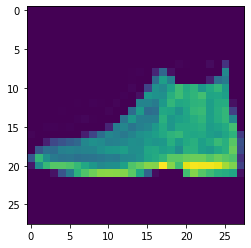

In [ ]:
# 실제 사진
plt.imshow(test_imgs[0])

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(label_names[predicted_label],
                                100*np.max(predictions_array),
                                label_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

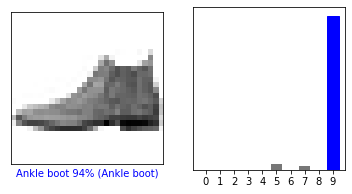

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_imgs)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

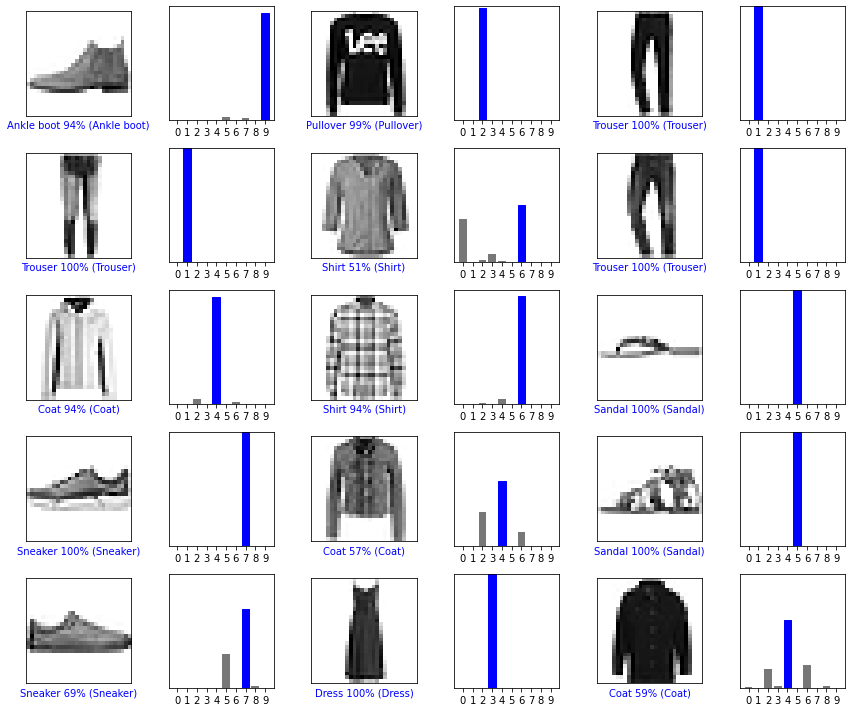

In [ ]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_imgs)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np 
import tensorflow as tf
x = tf.reshape(tf.range(180), [3, 2, 5, 6])
x

In [ ]:
dense = tf.keras.layers.Dense(100)

output = dense(x)

In [ ]:
output.shape

TensorShape([3, 2, 5, 100])